In [1]:
import wandb
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [85]:
#can use api to get run ids but have just donwloaded the flat cvs file instead. 
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("aaronwtr/perturbench")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

#runs_df.to_csv("project.csv")

In [30]:
df2 = pd.read_csv('wandb_baseline_r2.csv')
df2.head()

,Name,State,Group,Notes,User,Tags,Created,Runtime,Sweep,callbacks.learning_rate_monitor._target_,...,trainer.devices,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,epoch,lr-Adam,test/mse,train/mse,trainer/global_step,val/mse
0,clean-elevator-270,finished,mlp_norman_0.0,-,NaN,"hpo, mlp, norman, replicate_0, split_0.0",2024-06-05T15:23:18.000Z,269,NaN,lightning.pytorch.callbacks.LearningRateMonitor,...,1,30,1,0,30,0.00005,0.059001,0.056725,32580,0.057520
1,easy-gorge-269,finished,mlp_norman_0.0,-,NaN,"hpo, mlp, norman, replicate_1, split_0.0",2024-06-05T15:00:33.000Z,777,NaN,lightning.pytorch.callbacks.LearningRateMonitor,...,1,30,1,0,30,0.00005,0.061492,0.055226,52830,0.055394
2,robust-cosmos-268,finished,mlp_norman_0.0,-,NaN,"hpo, mlp, norman, replicate_2, split_0.0",2024-06-05T15:00:30.000Z,769,NaN,lightning.pytorch.callbacks.LearningRateMonitor,...,1,30,1,0,30,0.00005,0.058235,0.056207,50640,0.056177
3,dandy-pond-65,finished,mlp_norman_0.7,-,NaN,"hpo, mlp, norman, replicate_1, split_0.7",2024-06-05T09:24:47.000Z,52,NaN,lightning.pytorch.callbacks.LearningRateMonitor,...,1,30,1,0,30,0.00005,0.079585,0.060816,2610,0.061144
4,flowing-cherry-64,finished,mlp_norman_0.7,-,NaN,"hpo, mlp, norman, replicate_2, split_0.7",2024-06-05T09:24:22.000Z,55,NaN,lightning.pytorch.callbacks.LearningRateMonitor,...,1,30,1,0,30,0.00005,0.084439,0.057084,2670,0.058720


In [31]:
df_gf = pd.read_csv('wandb_gf_defalt.csv')
df_gf.head()

,Name,Tags,ID,State,Notes,User,Group,Job Type,Created,Updated,...,task_name,trainer._target_,trainer.accelerator,trainer.check_val_every_n_epoch,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps
0,deft-cloud-22,"hpo, mlp, norman, replicate_1, split_0.7",lttoa8a8,finished,-,NaN,mlp_norman_0.7,NaN,2024-06-05T13:15:48.000Z,2024-06-05T13:16:32.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0
1,easy-pine-21,"hpo, mlp, norman, replicate_1, split_0.6",lig4nsgk,finished,-,NaN,mlp_norman_0.6,NaN,2024-06-05T13:14:43.000Z,2024-06-05T13:15:33.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0
2,whole-sunset-20,"hpo, mlp, norman, replicate_1, split_0.5",96ehx82v,finished,-,NaN,mlp_norman_0.5,NaN,2024-06-05T13:13:21.000Z,2024-06-05T13:14:28.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0
3,confused-resonance-19,"hpo, mlp, norman, replicate_1, split_0.4",bdvr9pr9,finished,-,NaN,mlp_norman_0.4,NaN,2024-06-05T13:11:47.000Z,2024-06-05T13:13:04.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0
4,genial-dust-18,"hpo, mlp, norman, replicate_1, split_0.3",ap1m3l2p,finished,-,NaN,mlp_norman_0.3,NaN,2024-06-05T13:09:56.000Z,2024-06-05T13:11:31.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0


In [75]:
df = pd.read_csv('wandb_baseline.csv')
df.head()

,Name,Created,Group,Tags,test/mse,test_baseline/mse,test_de/mse,train/mse,val/mse
0,stoic-haze-56,2024-06-05T14:17:35.000Z,test_mlp_norman_0.7,"IKZF3_de, eval, mlp, norman, replicate_1, spli...",NaN,0.190044,0.186191,NaN,NaN
1,youthful-hill-37,2024-06-05T02:28:56.000Z,test_mlp_norman_0.0,"SLC4A1_de, eval, mlp, norman, replicate_0, spl...",NaN,0.383467,0.370128,NaN,NaN
2,lemon-vortex-33,2024-06-05T02:13:27.000Z,test_mlp_norman_0.0,"SET_de, eval, mlp, norman, replicate_0, split_0.0",NaN,0.300423,0.296696,NaN,NaN
3,prime-disco-230,2024-06-04T01:09:47.000Z,mlp_norman_0.8,"mlp, norman, replicate_1, split_0.8",0.071544,NaN,NaN,0.060080,0.057698
4,eternal-sun-229,2024-06-04T01:09:13.000Z,mlp_norman_0.8,"mlp, norman, replicate_0, split_0.8",0.063389,NaN,NaN,0.075439,0.076257


plt.style.use("seaborn")

## MSE plots for spectral params

In [33]:
spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] #'0.8']
def find_mets_by_spectral_params(model, metric_name, raw_data):
    '''find tabular metrics grouped by the spectral params'''
    met_by_sp = {}
    for sp in spectral_params:
        sp_sub = raw_data[raw_data['Group'] == f'{model}_{sp}']
        met_by_sp[f'{model}_{sp}'] = sp_sub[metric_name].values
    return pd.DataFrame(met_by_sp)

def find_spectral_auc(metric_df):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    return auc(x, y)

def plot_spectral_curve(metric_df, err='standard_error', zero_ylb=False, shading=True, errbar=True):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    if err == 'standard_error':
        yerr = metric_df.std() / (len(metric_df) ** 0.5 ) #Standard error for err bar 
    
    if errbar: #safe to remove if we go with fill_between for errors
        plt.errorbar(x, y, yerr=yerr, color='k', capsize = 3,elinewidth=1.5, linewidth=1.0)    
    else:
        plt.plot(x, y, color='k', linestyle='dashed', marker='o', linewidth=0.5)
        y_lower = y - yerr
        y_upper = y + yerr
        plt.fill_between(x, y_lower, y_upper, color='#D1E7FF', alpha=0.8, edgecolor='#aad3ff')
    axes = plt.gca()
    y_min, _ = axes.get_ylim()
    #
    if zero_ylb:
        y_min = 0
    if shading:
        plt.fill_between(x=x, y1=y, y2=y_min, color= "#D1E7FF", alpha=1.0)
    plt.xlabel('Spectral Parameter')
    plt.ylabel('MSE')

In [76]:
#
probe_model_ds = 'mlp_norman' #as named in Group col in df above
metric_name  = 'test/mse' #name of col for metric of intrest
test_mse = find_mets_by_spectral_params(probe_model_ds, metric_name, df)
test_mse_r2 = find_mets_by_spectral_params(probe_model_ds, metric_name, df2)
#test_mse_gf = find_mets_by_spectral_params(model, metric_name, df_gf)
find_spectral_auc(test_mse), find_spectral_auc(test_mse_r2)

(0.04582182324180996, 0.04629191147784388)

In [37]:
#working out to sort out cases where we don't have 3 reps
temp = {}
for sp in spectral_params:
    sp_sub = df_gf[df_gf['Group'] == f'{probe_model_ds}_{sp}']
    temp[f'{probe_model_ds}_{sp}'] = sp_sub[metric_name].values
df_gf[df_gf['Group'] == f'{probe_model_ds}_{0.5}']

,Name,Tags,ID,State,Notes,User,Group,Job Type,Created,Updated,...,task_name,trainer._target_,trainer.accelerator,trainer.check_val_every_n_epoch,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps
2,whole-sunset-20,"hpo, mlp, norman, replicate_1, split_0.5",96ehx82v,finished,-,NaN,mlp_norman_0.5,NaN,2024-06-05T13:13:21.000Z,2024-06-05T13:14:28.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0
8,sandy-leaf-14,"hpo, mlp, norman, replicate_0, split_0.5",9ftxasrx,finished,-,NaN,mlp_norman_0.5,NaN,2024-06-05T13:06:25.000Z,2024-06-05T13:07:49.000Z,...,train,lightning.pytorch.trainer.Trainer,cpu,1,${paths.output_dir},False,1,30,1,0


In [211]:
plt.style.use('default')

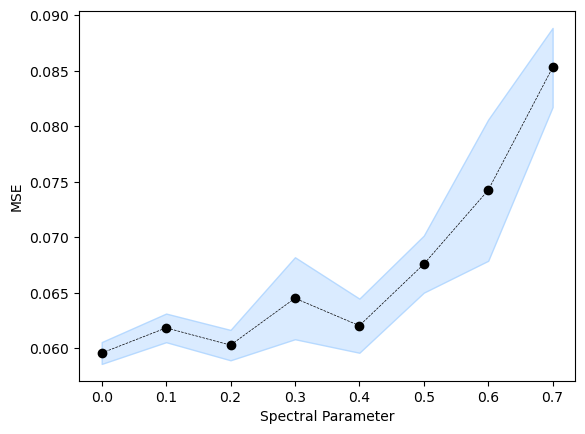

In [77]:
plot_spectral_curve(test_mse_r2, shading=False, errbar=False)

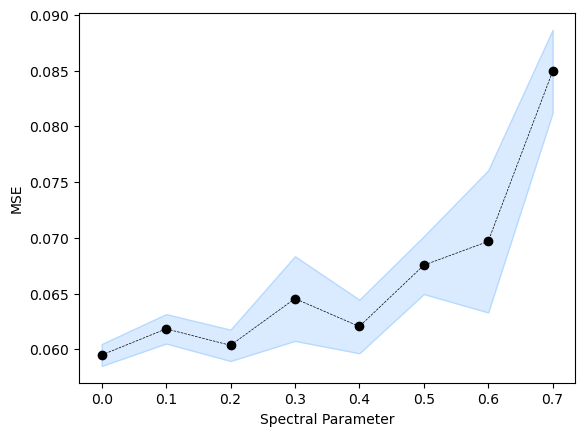

In [78]:
#current plot that we think well use
plot_spectral_curve(test_mse, shading=False, errbar=False)

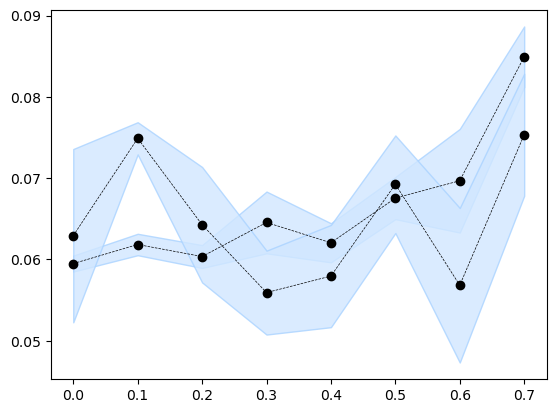

In [171]:
#can add multiple curves to the same plot as an example here we add a bit of noise to current results
#would need to sort the colors out with the overlaps. 
plot_spectral_curve(test_mse, shading=False, errbar=False)

noise_scale = 0.01  # Scale of the noise
noise = np.random.normal(0, noise_scale, test_mse.shape)
test_mse + noise
plot_spectral_curve(test_mse + noise, shading=False, errbar=False)

In [145]:
plt.style.use("seaborn")

C:\Users\Nik\AppData\Local\Temp\ipykernel_5624\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


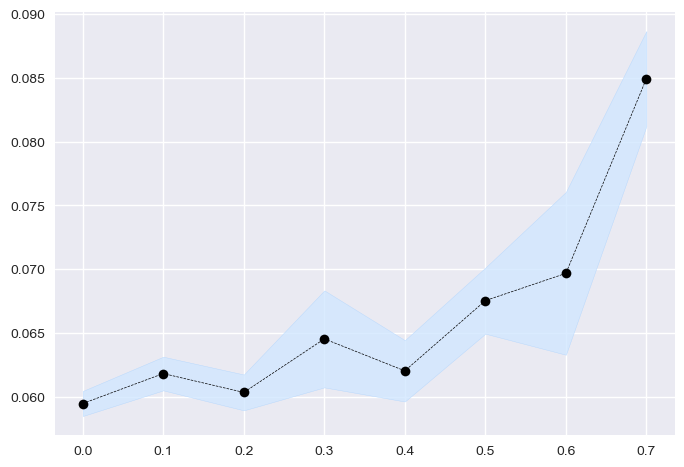

In [146]:
#with seaborn style
plot_spectral_curve(test_mse, shading=False, errbar=False)

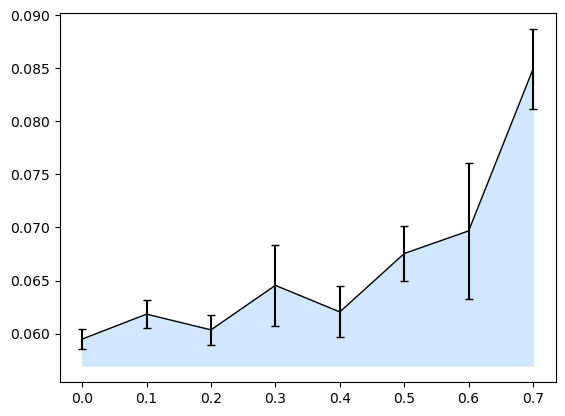

In [55]:
plot_spectral_curve(test_mse, errbar=True)

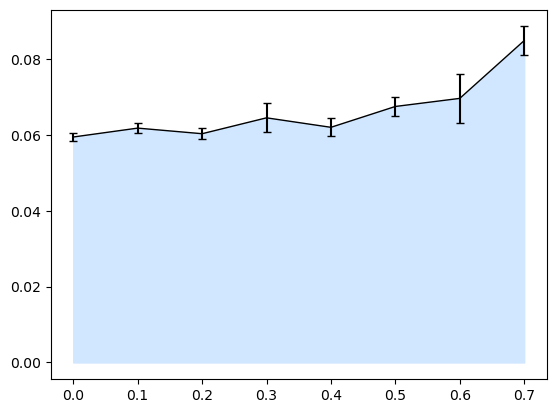

In [44]:
plot_spectral_curve(test_mse, zero_ylb=True)

## Plots and table for differentally expressed genes 

In [98]:
#diff expressed gene results have _de in there tags find idx of de gene
def find_diff_expres_subset(raw_results_df):
    diff_expres_idx = []
    diff_expres_genes = []
    for i, t in enumerate(raw_results_df['Tags']):
        if '_de' in t.split(',')[0]:
            diff_expres_idx.append(i)
            diff_expres_genes.append(t.split('_')[0])

    de_df = raw_results_df.iloc[diff_expres_idx].copy(deep=True)
    de_df['diff_express_gene'] = diff_expres_genes
    #drop missing (old perts we considered)
    de_df = de_df[~de_df['test_baseline/mse'].isna()]

    return diff_expres_idx, diff_expres_genes, de_df

def find_de_mets_by_gene(diff_express_df, sp, model, metrics=['test_baseline/mse', 'test_de/mse']):
    '''find tabular metrics grouped by de gene for a given (sp) spectral param'''
    results = {}
    sp_subset = diff_express_df[diff_express_df['Group'] == f'test_{model}_{sp}']
    for g in sp_subset['diff_express_gene']:
        de_df_subset = sp_subset[sp_subset['diff_express_gene'] == g]
        results[g] = de_df_subset[metrics]
    return results

def create_de_table(de_results_dict, models_name_mapping):
    #tabular results 
    de_tab = pd.concat(de_results_dict)
    if isinstance(de_tab, pd.Series):
        de_tab = pd.DataFrame(de_tab)
    #fmt table
    cols = [models_name_mapping[l] for l in de_tab.columns]
    de_tab.columns = cols
    new_idx = [idx[0] for idx in de_tab.index]
    de_tab.index = new_idx
    de_tab = de_tab.T.sort_values(by=new_idx[0])
    return de_tab

In [85]:
#subset raw results to just differenctal expression results 
diff_expres_idx, diff_expres_genes, de_df = find_diff_expres_subset(df)
#*_, de_df_r2 = find_diff_expres_subset(df2)

### table of de results

In [64]:
de_sp0_r2 = find_de_mets_by_gene(de_df_r2, sp, probe_model_ds)

In [66]:
de_sp0_r2

{'SLC4A1':    test_baseline/mse  test_de/mse
 0           0.383467     0.370128,
 'SET':    test_baseline/mse  test_de/mse
 1           0.300423     0.296696}

In [65]:
de_sp0

{'SLC4A1':    test_baseline/mse  test_de/mse
 0           0.383467     0.370128,
 'SET':    test_baseline/mse  test_de/mse
 1           0.300423     0.296696}

In [99]:
#sp and probe_model_ds should be the same for all de_sp dfs created
sp = 0.0
probe_model_ds = 'mlp_norman'

#name will change depending on fm model used 
models_name_mapping = {'test_baseline/mse': 'Null Benchmark', 'test_de/mse' : 'MLP Baseline'} 

de_sp0 = find_de_mets_by_gene(de_df, sp, probe_model_ds)
de_sp0_tab = create_de_table(de_sp0, models_name_mapping)

models_name_mapping = {'test_de/mse' : 'MLP Baseline_r2'} 
de_sp0_r2 = find_de_mets_by_gene(de_df, sp, probe_model_ds,  metrics='test_de/mse')
de_sp0_r2_tab = create_de_table(de_sp0_r2, models_name_mapping)
de_sp0_r2_tab

,SLC4A1,SET
MLP Baseline_r2,0.370128,0.296696


In [100]:
pd.concat((de_sp0_tab, de_sp0_r2_tab))

,SLC4A1,SET
MLP Baseline,0.370128,0.296696
Null Benchmark,0.383467,0.300423
MLP Baseline_r2,0.370128,0.296696


In [86]:
sp = 0.7
probe_model_ds = 'mlp_norman'
models_name_mapping = {'test_baseline/mse': 'Null Benchmark', 'test_de/mse' : 'MLP Baseline'} #form de_df above
de_sp7 = find_de_mets_by_gene(de_df, sp, probe_model_ds)
de_sp7_tab = create_de_table(de_sp7, models_name_mapping)
#de_sp0_r2_tab = create_de_table(de_sp0_r2, models_name_mapping)
de_sp7_tab

,IKZF3
MLP Baseline,0.186191
Null Benchmark,0.190044


### box plots of de results

In [200]:
def de_boxplot(de_results_dict, pert, models_name_mapping):
    y = de_results_dict[pert]
    assert len(y) == 1 #no reps 
    y = y.iloc[0].sort_values(ascending=True)
    cmap = plt.cm.get_cmap('tab20b', len(y)) 
    bar_colors = [cmap(i) for i in range(len(y))]
    bar_labels = [models_name_mapping[l] for l in y.index]
    plt.bar(bar_labels, y, label=bar_labels, 
            color=bar_colors, alpha=0.9
            )
    plt.xlabel(f'Perturbation {pert}')
    plt.ylabel('MSE')
    #plt.show()

In [101]:
de_sp0.keys()

dict_keys(['SLC4A1', 'SET'])

C:\Users\Nik\AppData\Local\Temp\ipykernel_27080\170521812.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20b', len(y))


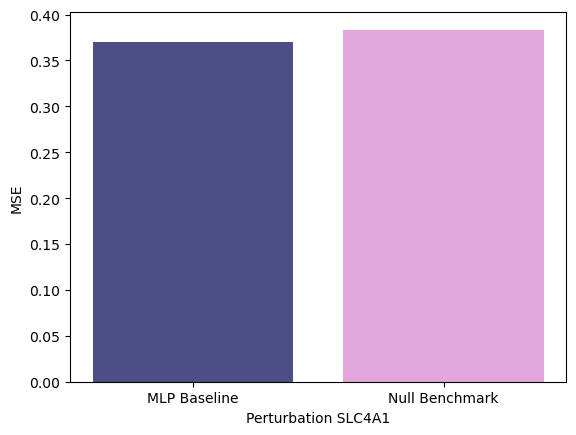

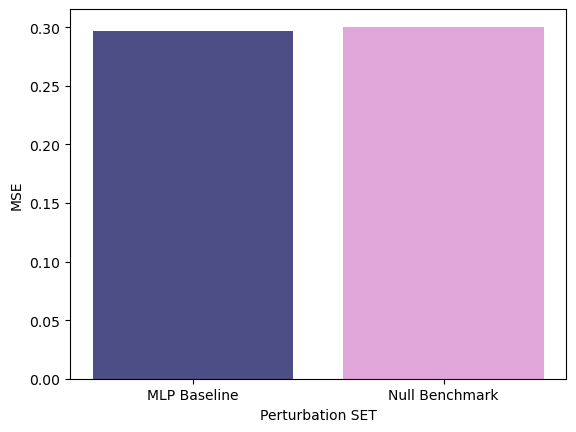

In [201]:
for pert in de_sp0.keys():
    de_boxplot(de_sp0, pert, models_name_mapping)
    plt.show()